# Reference
https://pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/

In [442]:
import cv2
import numpy as np
import imutils

from matplotlib import pyplot as plt

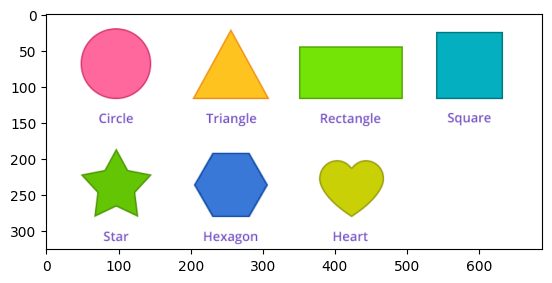

In [443]:
image = cv2.imread('../resources/shape.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

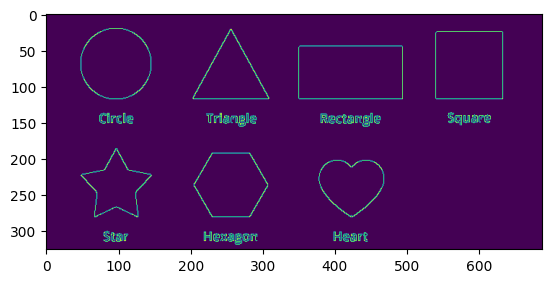

In [444]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
lower = 0.66 * np.mean(gray)
upper = 1.33 * np.mean(gray)
edged = cv2.Canny(gray, lower, upper)

plt.imshow(edged)


In [445]:
def is_circle(cnt):
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
    return len(approx) != 4

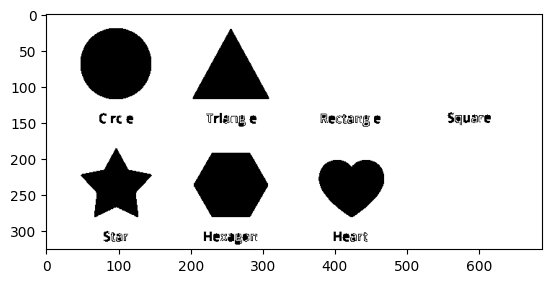

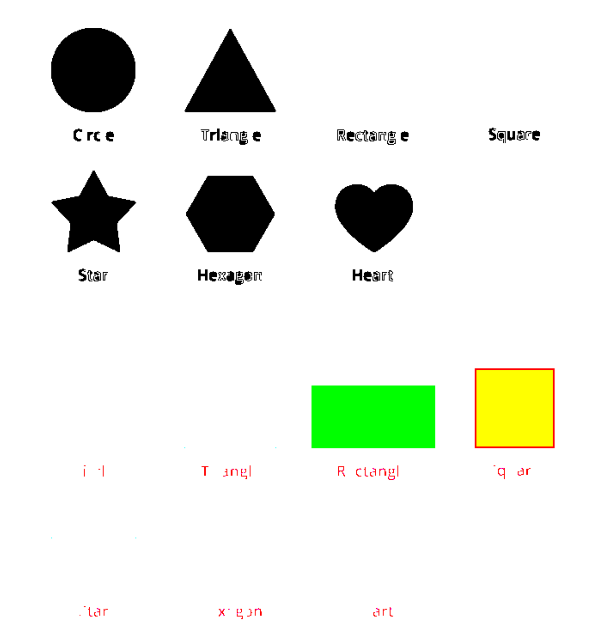

In [446]:
mask = np.ones(image.shape[:2], dtype=np.uint8)
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:
    if is_circle(c):
        cv2.drawContours(mask, [c], -1, 0, -1)

image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]
output = cv2.bitwise_and(image, image, mask=mask)

# convert back to white background
output = cv2.threshold(output, 127, 255, cv2.THRESH_BINARY_INV)[1]


fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].axis(False)
axs[0].imshow(mask, cmap=plt.cm.gray)

axs[1].axis(False)
axs[1].imshow(output, cmap=plt.cm.gray)

# plt.show()